# Statistics 📊

**Author:** James Cranley (<james.cranley@doctors.org.uk>)  
**Date:** March 2025

---

## Overview

In this notebook, you'll explore how to investigate associations between patient characteristics and outcomes—in this case, mortality status. Using a real dataset, you'll perform both univariate and multivariate analyses to understand how individual factors influence the risk of death.

### What You'll Learn

✅ **Univariate Testing:**
- T-tests to compare continuous variables (like age, serum creatinine) between groups.
- Chi-square tests to examine associations between categorical variables (such as diabetes, smoking) and mortality.

✅ **Multivariate Testing:**
- Logistic regression to simultaneously evaluate the influence of multiple predictors (both continuous and categorical variables found significant in univariate testing) on mortality status.
- Interpretation of odds ratios to understand the clinical significance of each predictor.

## Exercise
<div style="border-left: 4px solid #007acc; padding: 0.5em 1em; background-color: #f0f8ff; margin: 1em 0;">
  <h4>👨‍🏫 Bob</h4>
  <p>That heart failure data from the other day, can you find any predictors of death?</p>
</div>

### Import packages

In [1]:
import os # operating system: for interacting with files
import pandas as pd # key tabular data package in python
import numpy as np # important package for mathematics in python

### Reading data into dataframes

In [2]:
input_file_path = "./results/HF_data_inc_mortality.xlsx" # define the relative path to the file

We read in the Excel file into a **pandas dataframe** called df.

In [3]:
df = pd.read_excel(input_file_path) # Pandas library has a built in Excel read/write function

### Inspect the data

In [4]:
df.head()

patient_ID   age  anaemia  creatinine_phosphokinase  diabetes  \
0      360061  75.0        0                       582         0   
1      118349  55.0        0                      7861         0   
2      557032  65.0        0                       146         0   
3      851734  50.0        1                       111         0   
4      375585  65.0        1                       160         1   

   ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
0                 20                    1  265000.00               1.9   
1                 38                    0  263358.03               1.1   
2                 20                    0  162000.00               1.3   
3                 20                    0  210000.00               1.9   
4                 20                    0  327000.00               2.7   

   serum_sodium  sex  smoking  one_year_mortality_status  
0           130    1        0                        1.0  
1           136    1        0                        1.0  
2           129    1        1                        1.0  
3           137    1        0                        1.0  
4           116    0        0                        1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_ID                 299 non-null    int64  
 1   age                        299 non-null    float64
 2   anaemia                    299 non-null    int64  
 3   creatinine_phosphokinase   299 non-null    int64  
 4   diabetes                   299 non-null    int64  
 5   ejection_fraction          299 non-null    int64  
 6   high_blood_pressure        299 non-null    int64  
 7   platelets                  299 non-null    float64
 8   serum_creatinine           299 non-null    float64
 9   serum_sodium               299 non-null    int64  
 10  sex                        299 non-null    int64  
 11  smoking                    299 non-null    int64  
 12  one_year_mortality_status  289 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 30.5 KB


In [6]:
# Drop rows with missing mortality status, since this is non-usable data
data_clean = df.dropna(subset=['one_year_mortality_status'])

## Univariate testing

- For **continuous** variables, we can use **T-tests**
- For **categorical** variables, we can use **chi-square tests**

### Continuous (T tests)

In [7]:
!pip install scipy

This code performs **t-tests** to determine if there's a significant difference between two groups: patients who survived and patients who did not survive.

The variables being tested are all **continuous**, meaning they're numerical and can take many possible values.

To start with, **let's perform a T test one variable, age**.

In [8]:
# Subset the data to the rows where the patietn survived to one year
group_alive = data_clean[data_clean['one_year_mortality_status'] == 0]['age']
group_alive

14     49.0
20     65.0
23     53.0
33     50.0
38     60.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 197, dtype: float64

In [9]:
# We do the same for deceased
group_deceased = data_clean[data_clean['one_year_mortality_status'] == 1]['age']

In [10]:
# Import the T test function from SciPy

from scipy.stats import ttest_ind

ttest_ind(group_alive, group_deceased)

TtestResult(statistic=np.float64(-4.475391743222897), pvalue=np.float64(1.101016353250365e-05), df=np.float64(287.0))

We can see the p value is very small, suggesting **age is significantly different** between surviviors and deceased.

Now let's **do the same for all the variables**.

In [11]:
# Define continuous variables
continuous_vars = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium'
]

In [12]:
# Prepare a blank list to store the results
results_list = []

In [13]:
# Perform the T-test on all the variables

from scipy.stats import ttest_ind # import a T test function from the SciPy package (stats)

# Perform t-tests and store results
for var in continuous_vars:
    group_alive = data_clean[data_clean['one_year_mortality_status'] == 0][var]
    group_deceased = data_clean[data_clean['one_year_mortality_status'] == 1][var]
    t_stat, p_val = ttest_ind(group_alive, group_deceased)
    significant = 'Yes' if p_val < 0.05 else 'No'
    
    # Append each result as a dictionary to the list
    results_list.append({
        'Variable': var,
        'T-Statistic': t_stat,
        'P-Value': p_val,
        'Significant': significant
    })

# Convert the list of results to a DataFrame
results_continuous = pd.DataFrame(results_list)
results_continuous

Variable  T-Statistic       P-Value Significant
0                       age    -4.475392  1.101016e-05         Yes
1  creatinine_phosphokinase    -0.986544  3.246973e-01          No
2         ejection_fraction     4.382779  1.645473e-05         Yes
3                 platelets     0.711969  4.770622e-01          No
4          serum_creatinine    -5.178675  4.212789e-07         Yes
5              serum_sodium     3.550694  4.488587e-04         Yes

For each variable in the list:
- Separates data into two groups: survivors and deceased.
- Runs a t-test to compare the mean values between these two groups.
- The t-statistic measures how much the averages differ between groups, considering the variability in the data.
- The p-value tells you if this difference is statistically significant.

### Categorical (chi-square tests)

For each categorical variable, perform the following steps:
- **Create a contingency table**: This is a simple table showing the number of people in each group who survived or didn't survive.
- **Run the chi-square test**: It compares the observed counts to what you would expect if there was no relationship.

In [14]:
contingency_table = pd.crosstab(data_clean['high_blood_pressure'], data_clean['one_year_mortality_status'])
contingency_table

one_year_mortality_status  0.0  1.0
high_blood_pressure                
0                          134   56
1                           63   36

In [15]:
# Perform the chi-square test

from scipy.stats import chi2_contingency

chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(1.124042878136098), pvalue=np.float64(0.28904958022403915), dof=1, expected_freq=array([[129.51557093,  60.48442907],
       [ 67.48442907,  31.51557093]]))

The p value was **not significant** (0.29).

Let's **run a chi-square test on all the categorical variables** now.

In [16]:
# Define categorical variables
categorical_vars = [
    'anaemia',
    'diabetes',
    'high_blood_pressure',
    'sex',
    'smoking'
]

In [17]:
# Prepare a blank list to store the results
results_list = []

In [18]:
from scipy.stats import chi2_contingency

# Loop through each variable
for var in categorical_vars:
    # Create contingency table (counts of survival vs. death)
    contingency_table = pd.crosstab(data_clean[var], data_clean['one_year_mortality_status'])
    
    # Perform the chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Check if result is statistically significant (p-value < 0.05 usually means "significant")
    significant = 'Yes' if p_val < 0.05 else 'No'
    
    # Add the results to the results list
    results_list.append({
        'Variable': var,
        'Chi2-Statistic': chi2_stat,
        'P-Value': p_val,
        'Significant': significant
    })

# Put the results in a datafram
results_categorical = pd.DataFrame(results_list)
results_categorical

Variable  Chi2-Statistic   P-Value Significant
0              anaemia        1.883396  0.169949          No
1             diabetes        0.007440  0.931263          No
2  high_blood_pressure        1.124043  0.289050          No
3                  sex        0.000000  1.000000          No
4              smoking        0.000000  1.000000          No

**None of the categorical variables were significant** at the univariate level

## Multivariate testing

### 🔍 What This Logistic Regression Code Does:
In the previous univariate testing step, we found certain variables were significantly associated with mortality.

Now **we want to analyse these significant variables together** to see how each one **independently** affects the chance of dying.

**Logistic regression allows us to combine multiple variables into a single model**, considering them simultaneously, and helps us understand which variables are truly important after controlling for the influence of others.

In [19]:
!pip install statsmodels

### Step 1: Subset the data

We make a subset of the data which only inlcudes the response variable (one_year_mortality_status) and variables which were signficiant at the univariate level

In [20]:
model_data = data_clean[['one_year_mortality_status', 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']].dropna()
model_data

one_year_mortality_status   age  ejection_fraction  serum_creatinine  \
0                          1.0  75.0                 20               1.9   
1                          1.0  55.0                 38               1.1   
2                          1.0  65.0                 20               1.3   
3                          1.0  50.0                 20               1.9   
4                          1.0  65.0                 20               2.7   
..                         ...   ...                ...               ...   
294                        0.0  62.0                 38               1.1   
295                        0.0  55.0                 38               1.2   
296                        0.0  45.0                 60               0.8   
297                        0.0  45.0                 38               1.4   
298                        0.0  50.0                 45               1.6   

     serum_sodium  
0             130  
1             136  
2             129  
3             137  
4             116  
..            ...  
294           143  
295           139  
296           138  
297           140  
298           136  

[289 rows x 5 columns]

### Step 2: Prepare the data for the model

We separate our data into two groups:
1. **Independent Variables (X)**: The **predictors** that might affect mortality.
2. **Dependent Variable (y)**: The **outcome** we want to predict (mortality status).

In [21]:
import statsmodels.api as sm

X = model_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
X = sm.add_constant(X)  # This adds a constant (intercept) term to the model
# The constant represents the baseline odds when all predictors equal zero, which typically doesn't carry intuitive clinical meaning and isn't interpreted as a predictor effect.

y = model_data['one_year_mortality_status']

### Step 3: Build the model

The `.fit()` method builds the logistic regression model based on the provided data.

In [22]:
logistic_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.509422
         Iterations 6


### Step 4: Review the results

In [23]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     one_year_mortality_status   No. Observations:                  289
Model:                                 Logit   Df Residuals:                      284
Method:                                  MLE   Df Model:                            4
Date:                       Tue, 25 Mar 2025   Pseudo R-squ.:                  0.1857
Time:                               09:10:59   Log-Likelihood:                -147.22
converged:                              True   LL-Null:                       -180.80
Covariance Type:                   nonrobust   LLR p-value:                 9.031e-14
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6994      4.552      1.032      0.302      -4.223      13.622
age                   0.0518      0.013      4.110      0.000       0.027       0.077
ejection_fraction    -0.0614      0.014     -4.285      0.000      -0.089      -0.033
serum_creatinine      0.6169      0.160      3.852      0.000       0.303       0.931
serum_sodium         -0.0535      0.033     -1.614      0.107      -0.118       0.011
=====================================================================================
"""

This summary shows you:
- **Coefficients (log-odds)**: Whether each variable increases or decreases the likelihood of mortality.
- **P-values**: Indicate which variables remain statistically significant after adjusting for others.

To clearly interpret the practical effects, we convert these coefficients into:

**Odds Ratios (OR)** are more interpretable than log-odds and can be calcualted from them:

In [24]:
# Compute Odds Ratios and Confidence Intervals (corrected)
odds_ratios = pd.DataFrame({
    'Odds Ratio': np.exp(logistic_model.params.values),
    'CI Lower': np.exp(logistic_model.conf_int()[0]),
    'CI Upper': np.exp(logistic_model.conf_int()[1]),
    'P-value': logistic_model.pvalues
})

odds_ratios

Odds Ratio  CI Lower       CI Upper   P-value
const              109.877262  0.014655  823793.094800  0.301927
age                  1.053216  1.027495       1.079580  0.000040
ejection_fraction    0.940465  0.914427       0.967245  0.000018
serum_creatinine     1.853109  1.353868       2.536445  0.000117
serum_sodium         0.947929  0.888333       1.011523  0.106501

We can **save the model** for later use with `pickle`

In [25]:
import pickle

# Save the logistic regression model
model_path = "./results/logistic_model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(logistic_model, file)

## **🏡 Take-Homes**

**Age**, **ejection fraction**, and **serum creatinine** remain **significant predictors of mortality** in the multivariate model.

- Each **additional year of age** increases mortality odds by approximately **5%**.
- Each **unit increase in ejection fraction** decreases mortality odds by approximately **6%**.
- Each **unit increase in serum creatinine** (NB US units (mg/dL) = 88.4 µmol/L) increases mortality odds by approximately **85%**.

**Serum sodium loses significance when included in the multivariate model**, suggesting potential confounding or correlation with other predictors.

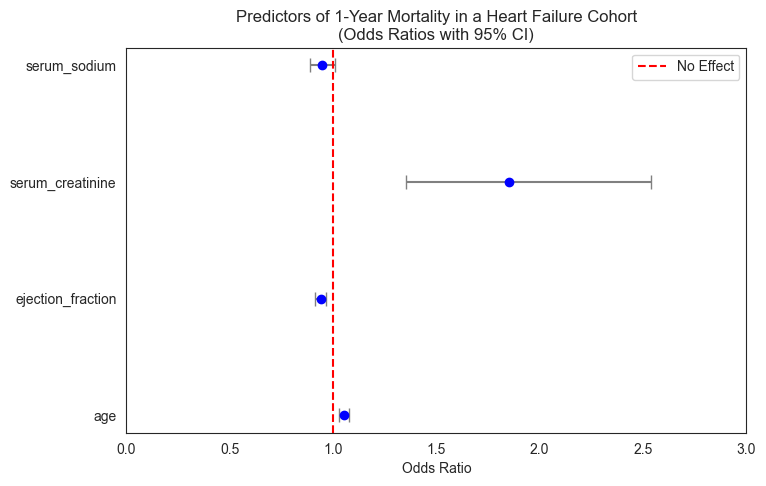

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Odds Ratios and Confidence Intervals
odds_ratios = np.exp(logistic_model.params)
conf = np.exp(logistic_model.conf_int())
variables = odds_ratios.index

# Prepare DataFrame, excluding the constant
forest_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'CI Lower': conf[0],
    'CI Upper': conf[1]
}, index=variables).drop('const')


# Plotting
plt.figure(figsize=(8, 5))
sns.set_style("white")
plt.errorbar(forest_df['Odds Ratio'], forest_df.index, 
             xerr=[forest_df['Odds Ratio'] - forest_df['CI Lower'], 
                   forest_df['CI Upper'] - forest_df['Odds Ratio']],
             fmt='o', color='blue', ecolor='gray', capsize=5)

plt.axvline(x=1, linestyle='--', color='red', label='No Effect')
plt.xlabel('Odds Ratio')
plt.xlim(0, 3)

# Improved descriptive title
plt.title('Predictors of 1-Year Mortality in a Heart Failure Cohort\n(Odds Ratios with 95% CI)')

plt.legend()

# Save the figure as a PDF
plt.savefig('./results/forest_plot_odds_ratios.pdf', bbox_inches='tight')

plt.show()